In [239]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## <font color='red'>Reading and preparing data </font>

In [240]:
df = pd.read_csv("data.csv")
len(df)

11914

In [241]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [246]:
# replace all spaces with underscores and lowercase all letters

df.columns = df.columns.str.lower().str.replace(" ","_")
string_columns = list(df.dtypes[df.dtypes == "object"].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")
    
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [247]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [248]:
df["make"].value_counts()

chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyker    

<AxesSubplot:xlabel='msrp', ylabel='Count'>

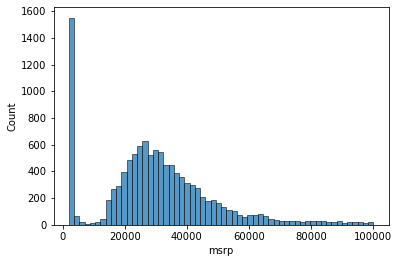

In [249]:
sns.histplot(df.msrp[df.msrp < 100000], kde=False)

In [250]:
# we notice a long tail

In [251]:
log_price = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

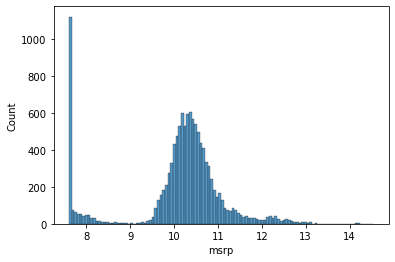

In [252]:
sns.histplot(log_price, kde=False)

## <font color='red'>Checking for missing values</font>

In [253]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

We will need to deal with missing values later, when we train the model, so we should
keep this problem in mind. For now, we won’t do anything else with these features and will
proceed to the next step: setting up the validation framework so that we can train and test
machine learning models.

## <font color='red'>Validation framework</font>

In [254]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffuled = df.iloc[idx]

df_train = df_shuffuled[:n_train].copy()
df_test = df_shuffuled[n_train:n_train+n_test].copy()
df_val = df_shuffuled[n_train + n_test:].copy()

In [255]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [256]:
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

## <font color='red'> Machine learning for regression </font>

In [287]:
def linear_regression(X, y):
#   adding the dummy column which includes only ones
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
#   normal equation formula
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

## <font color='red'> Ridge regression </font>

In [288]:
def linear_regression_reg(X, y, r=0.0):
#   adding the dummy column which includes only ones
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
#   normal equation formula
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

## <font color='red'>Predicting the price</font>

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [293]:
# choose only the numerical features 
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
'popularity']


def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2022 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_{}'.format(v)
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
        
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_{}'.format(v)
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    for v in ["automatic", "manual", "automated_manual"]:
        feature = "is_transimssion_{}".format(v)
        df[feature] = (df["transmission_type"] == v).astype(int)
        features.append(feature)
    
    
    df_num = df[features]
    df_num = df_num.fillna(0)    
    return df_num.values

In [294]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

In [295]:
# get the coefficients
w_0, w = linear_regression(X_train, y_train)


In [296]:
y_pred = w_0 + X_val.dot(w)

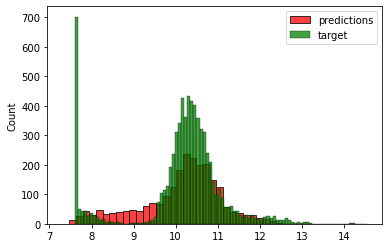

In [297]:
sns.histplot(y_pred, label = "predictions", color="red")
sns.histplot(y_train, label = "target", color="green")
plt.legend()

In [298]:

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

print(rmse(y_val, y_pred))

0.49723980698550907


## <font color='red'>Regularization</font>